In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

In [4]:
file_name = '../rr_2_89_batch_w1.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

PMFs
[0.8 0.2] [0.9 0.1]
average cost B [1.57452268 1.54027146 1.52787236 1.52422978 1.5174899  1.51495197
 1.51217257 1.50969545 1.50759378 1.50177608 1.5009708  1.49840513
 1.4967977  1.49697436 1.49590466 1.49561668]


In [5]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

Expected cost for c = 0 case: 1.628
[[1.41421356 2.23606798]
 [2.23606798 1.41421356]]
1.496399003378942


[-0.91057415 -1.32086038] [0.04593348]


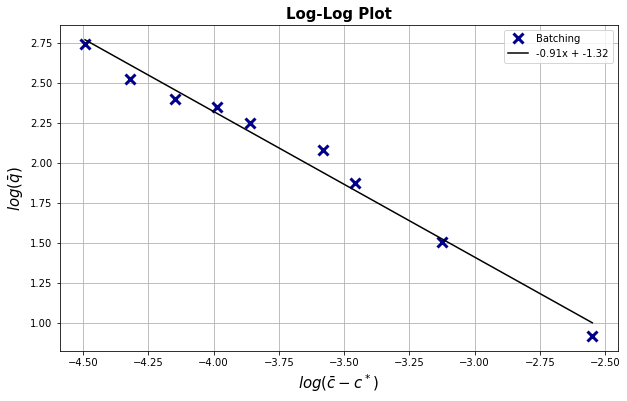

In [6]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [14]:
file_name = '../rr_2_89_batch_w2.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

PMFs
[0.8 0.2] [0.9 0.1]
average cost B [3.7300203  3.72907469 3.73137151 3.72976069 3.7305236  3.7335339
 3.73333721 3.72834145 3.72917426 3.73482788 3.72929022 3.73271665
 3.73375208 3.73212675 3.73232291 3.73231601]


In [15]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

Expected cost for c = 0 case: 3.732
[[4.12310563 3.16227766]
 [2.64575131 1.73205081]]
3.731551966801979


c:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


LinAlgError: SVD did not converge in Linear Least Squares

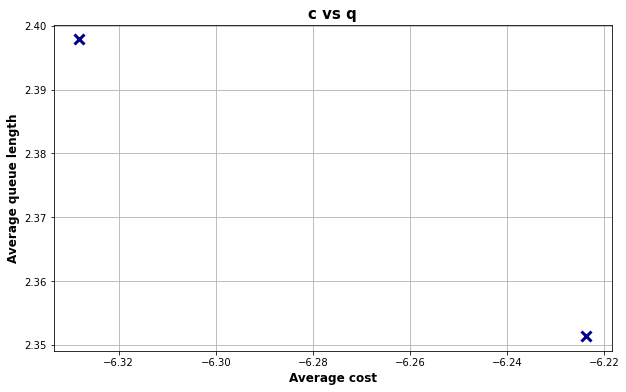

In [16]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [18]:
file_name = '../rr_2_32_batch_w2.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

PMFs
[0.3 0.7] [0.2 0.8]
average cost B [2.34072049 2.34283711 2.34504576 2.34571512 2.34541091 2.34719006
 2.34332914 2.34036854 2.344739   2.34439627 2.33603189 2.34195281
 2.34383551 2.34190372 2.3457922  2.34495397]
Expected cost for c = 0 case: 2.347
[[4.12310563 3.16227766]
 [2.64575131 1.73205081]]
2.3438589640914365


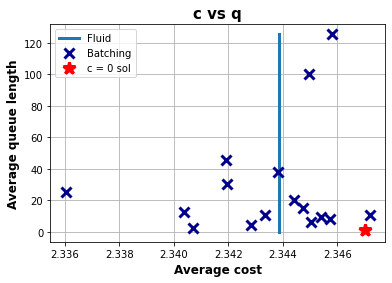

In [21]:
ylim = max( average_queue_B )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

In [ ]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

Expected cost for c = 0 case: 3.732
[[4.12310563 3.16227766]
 [2.64575131 1.73205081]]
3.731551966801979


PMFs
[0.3 0.7] [0.6 0.4]
average cost B [2.71188636 2.71546556 2.70702708 2.70779341 2.70640745 2.70997591
 2.70929315 2.70723863 2.7095423  2.70743128 2.71302765 2.70515129
 2.7059491  2.71048348 2.71583025 2.71550767]
Expected cost for c = 0 case: 2.718
[[4.12310563 3.16227766]
 [2.64575131 1.73205081]]
2.7093391654730183


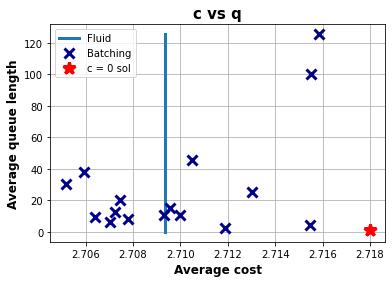

In [22]:
file_name = '../rr_2_36_batch_w2.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

PMFs
[0.3 0.7] [0.6 0.4]
average cost B [1.71402161 1.68164173 1.66999311 1.6673536  1.66278363 1.66458405
 1.66222238 1.65916537 1.6629398  1.66118098 1.66213485 1.66173184
 1.65998482 1.6613699  1.66053095 1.66162633]
Expected cost for c = 0 case: 1.858
[[1.41421356 2.23606798]
 [2.23606798 1.41421356]]
1.6607698870859702


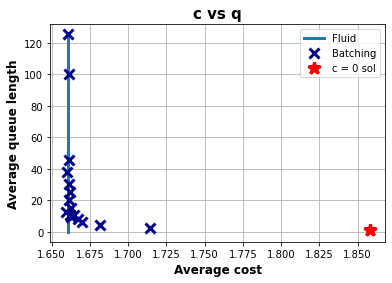

In [26]:
file_name = '../rr_2_36_batch_w1.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

PMFs
[0.3 0.7] [0.2 0.8]
average cost B [2.34072049 2.34283711 2.34504576 2.34571512 2.34541091 2.34719006
 2.34332914 2.34036854 2.344739   2.34439627 2.33603189 2.34195281
 2.34383551 2.34190372 2.3457922  2.34495397]
Expected cost for c = 0 case: 2.347
[[4.12310563 3.16227766]
 [2.64575131 1.73205081]]
2.3438589640914365


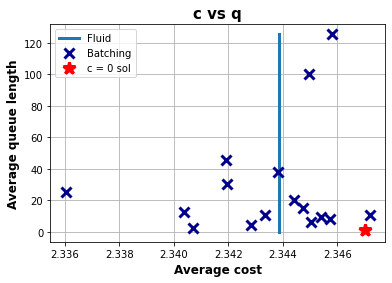

In [33]:
file_name = '../rr_2_32_batch_w2.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

PMFs
[0.8 0.2] [0.2 0.8]
average cost B [3.06586143 3.05769788 3.06224043 3.06714818 3.0614061  3.06212652
 3.0625273  3.06699539 3.06046447 3.06167729 3.05641945 3.05444483
 3.06001175 3.0621566  3.06047513 3.06273382]
Expected cost for c = 0 case: 3.067
[[4.12310563 3.16227766]
 [2.64575131 1.73205081]]
3.058972390408125


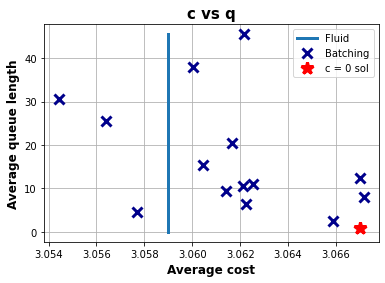

In [34]:
file_name = '../rr_2_82_batch_w2.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

beg = 0
end = len(average_queue_B) - 2
ylim = max( average_queue_B[beg:end])
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B[beg:end],average_queue_B[beg:end],'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

In [39]:
Tbatches = np.asarray([1, 4, 5, 7, 8, 12, 15, 18, 20, 21, 24, 30, 35, 38, 40, 44, 45, 50])

In [40]:
len(Tbatches)

18

# W1 all plots

In [7]:
file_name = '../rr_2_89_batch_w1.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

PMFs
[0.8 0.2] [0.9 0.1]
average cost B [1.57452268 1.54027146 1.52787236 1.52422978 1.5174899  1.51495197
 1.51217257 1.50969545 1.50759378 1.50177608 1.5009708  1.49840513
 1.4967977  1.49697436 1.49590466 1.49561668]
Expected cost for c = 0 case: 1.628
[[1.41421356 2.23606798]
 [2.23606798 1.41421356]]
1.496399003378942


[-0.91057415 -1.32086038] [0.04593348]


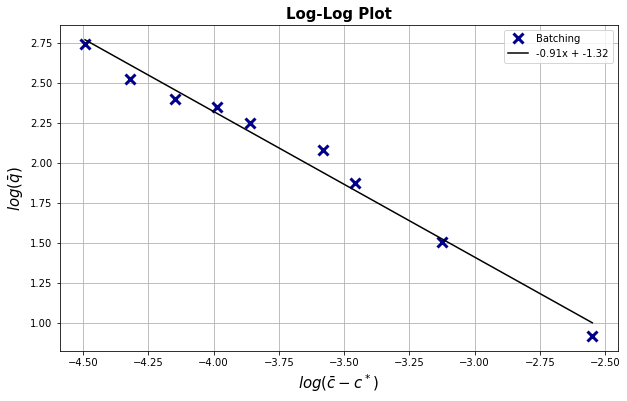

In [8]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])